In [97]:
import pandas as pd
import numpy as np
from pylab import mpl

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei']


In [2]:
df=pd.read_excel('./信用债成交记录表2020年09月2日周三.xls',sheet_name='页面模板',header=1)
df

,剩余期限,简称,收益率,评级,剩余期限.1,简称.1,收益率.1,评级.1
0,短融,NaN,NaN,NaN,2.05Y,19通用MTN001A,3.62,AAA
1,259D,20浙交投SCP006,3.16,AAA,2.05Y,19通用MTN001A,3.62,AAA
2,259D,20浙交投SCP006,3.15,AAA,2.05Y,19通用MTN001A,3.62,AAA
3,332D,20内蒙电投CP001,4.4,AA+,2.06Y,19国电MTN003,3.5,AAA
4,中票,NaN,NaN,NaN,2.06Y,19国电MTN003,3.5,AAA
...,...,...,...,...,...,...,...,...
241,2.07Y+2Y,19万科02,3.6,AAA,2.18Y+2Y,19筑城01,4.95,AA+
242,4.07Y+NY,19华电Y4,4.21,AAA,4.37Y,20义乌02,4.32,AA+
243,4.2Y+NY,19建设银行永续债,4.5,AAA,2.47Y+2Y,20南新01,5.37,AA+
244,4.25Y,19鲁高02,4.04,AAA,2.91Y+2Y,20涪陵03,4.18,AA+


In [3]:
df_s=df.iloc[:,4:]
df_s.columns=df.iloc[:,:4].columns
df2=pd.concat([df.iloc[:,:4],df_s],axis=0,ignore_index=True)
df2

,剩余期限,简称,收益率,评级
0,短融,NaN,NaN,NaN
1,259D,20浙交投SCP006,3.16,AAA
2,259D,20浙交投SCP006,3.15,AAA
3,332D,20内蒙电投CP001,4.4,AA+
4,中票,NaN,NaN,NaN
...,...,...,...,...
487,2.18Y+2Y,19筑城01,4.95,AA+
488,4.37Y,20义乌02,4.32,AA+
489,2.47Y+2Y,20南新01,5.37,AA+
490,2.91Y+2Y,20涪陵03,4.18,AA+


In [4]:
start=df2[df2['剩余期限']=='中票'].index[0]

In [5]:
end=df2[df2['剩余期限']=='企业债'].index[0]

In [6]:
df_zhongpiao=df2.iloc[start+1:end]

In [99]:
if '剩余期限' in df_zhongpiao.columns:
    df_zhongpiao['剩余期限']=df_zhongpiao['剩余期限'].apply(lambda x:x.replace('D','').replace('Y','*365'))
    df_zhongpiao['剩余期限']

In [8]:
for one in df_zhongpiao.index:
#     print(one)
    qixian=df_zhongpiao.loc[one]['剩余期限']
#     print(one)
    if '('in qixian or 'N'in qixian or '+'in qixian or '债'in qixian or '期'in qixian:
        df_zhongpiao.drop(one,inplace=True)
df_zhongpiao

C:\Users\zikep\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,剩余期限,简称,收益率,评级
5,323,16武汉地产MTN003,3.3,AAA
7,343,16川高速MTN001,3.23,AAA
8,1.13*365,18河钢集MTN010,3.3,AAA
9,1.13*365,18河钢集MTN010,3.3,AAA
10,1.13*365,18河钢集MTN010,3.3,AAA
...,...,...,...,...
135,363,16河南铁路MTN001,3.82,AA
136,2.14*365,19邵阳城投MTN001,5.1,AA
137,2.23*365,17蔡甸城投MTN002,4.1,AA
138,2.63*365,20滹沱投资MTN001,4.68,AA


In [9]:
df_zhongpiao['剩余期限']=df_zhongpiao['剩余期限'].apply(lambda x:eval(x))

C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_zhongpiao.columns='days name ytm rating'.split(' ')
df_zhongpiao

,days,name,ytm,rating
5,323.00,16武汉地产MTN003,3.3,AAA
7,343.00,16川高速MTN001,3.23,AAA
8,412.45,18河钢集MTN010,3.3,AAA
9,412.45,18河钢集MTN010,3.3,AAA
10,412.45,18河钢集MTN010,3.3,AAA
...,...,...,...,...
135,363.00,16河南铁路MTN001,3.82,AA
136,781.10,19邵阳城投MTN001,5.1,AA
137,813.95,17蔡甸城投MTN002,4.1,AA
138,959.95,20滹沱投资MTN001,4.68,AA


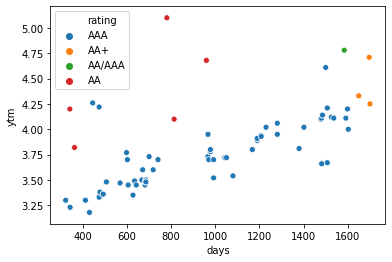

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.scatterplot(df_zhongpiao['days'],df_zhongpiao['ytm'],df_zhongpiao['rating'])

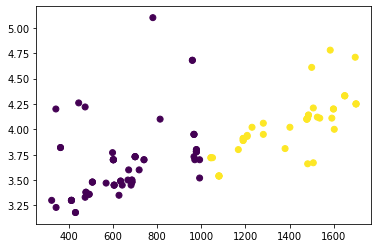

In [12]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(df_zhongpiao[['days','ytm']])
plt.scatter(df_zhongpiao['days'],df_zhongpiao['ytm'], c=y_pred)
plt.show()

In [13]:
df_hist=pd.read_excel('./bond_hist_data.xls',sheet_name='AAA',index_col=0)
df_hist.head()

,2020-09-03
中债中短期票据收益率曲线(AAA)(到期) --单位: 年,
0.0,2.3462
0.1,2.5638
0.2,2.7707
0.3,2.7894
0.4,2.9017


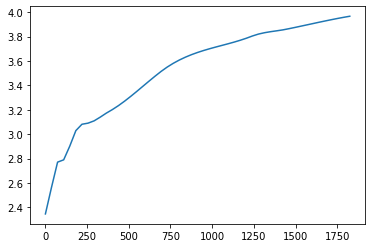

In [14]:
plt.plot(df_hist.index*365,df_hist.iloc[:,0])

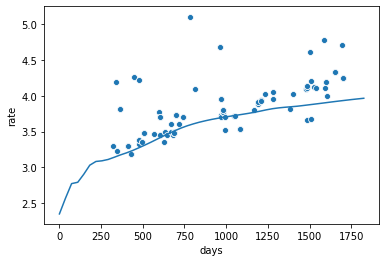

In [27]:
sns.scatterplot(df_zhongpiao['days'],df_zhongpiao['ytm'])
sns.lineplot(df_hist.index,df_hist.iloc[:,0])

In [16]:
df_hist=pd.read_excel('./bond_hist_data.xls',sheet_name='AAA',index_col=0)
df_hist.columns=['rate']
df_hist.index=list(map(lambda x:round(x,0),df_hist.index*365))

In [17]:
df_hist.tail()

,rate
1679.0,3.9280
1716.0,3.9382
1752.0,3.9481
1789.0,3.9574
1825.0,3.9662


df_full=pd.DataFrame(index=[i for i in range(365*5+10)],columns=['rate'])
df_full.loc[df_hist.index.tolist()]=df_hist.iloc[:,0].tolist()

In [18]:
df_full=pd.DataFrame(index=[i for i in range(365*5+10)])
df_full=pd.concat([df_full,df_hist],axis=1)
df_full

,rate
0.0,2.3462
1.0,NaN
2.0,NaN
3.0,NaN
4.0,NaN
...,...
1830.0,NaN
1831.0,NaN
1832.0,NaN
1833.0,NaN


In [19]:
df_full.interpolate(inplace=True)
df_full

,rate
0.0,2.346200
1.0,2.352244
2.0,2.358289
3.0,2.364333
4.0,2.370378
...,...
1830.0,3.966200
1831.0,3.966200
1832.0,3.966200
1833.0,3.966200


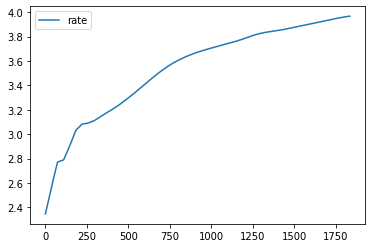

In [20]:
df_full.plot()

In [21]:
df_zhongpiao[['days','ytm']]

,days,ytm
5,323.00,3.3
7,343.00,3.23
8,412.45,3.3
9,412.45,3.3
10,412.45,3.3
...,...,...
135,363.00,3.82
136,781.10,5.1
137,813.95,4.1
138,959.95,4.68


In [22]:
benchmark=df_full.loc[df_zhongpiao['days'].apply(lambda x:round(x,0))]
df_zhongpiao['licha']=df_zhongpiao['ytm']-benchmark['rate'].tolist()

C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
df_zhongpiao

,days,name,ytm,rating,licha
5,323.00,16武汉地产MTN003,3.3,AAA,0.165008
7,343.00,16川高速MTN001,3.23,AAA,0.0774622
8,412.45,18河钢集MTN010,3.3,AAA,0.0896722
9,412.45,18河钢集MTN010,3.3,AAA,0.0896722
10,412.45,18河钢集MTN010,3.3,AAA,0.0896722
...,...,...,...,...,...
135,363.00,16河南铁路MTN001,3.82,AA,0.649678
136,781.10,19邵阳城投MTN001,5.1,AA,1.50865
137,813.95,17蔡甸城投MTN002,4.1,AA,0.485419
138,959.95,20滹沱投资MTN001,4.68,AA,0.99003


In [24]:
df_zhongpiao[['days','licha']]

,days,licha
5,323.00,0.165008
7,343.00,0.0774622
8,412.45,0.0896722
9,412.45,0.0896722
10,412.45,0.0896722
...,...,...
135,363.00,0.649678
136,781.10,1.50865
137,813.95,0.485419
138,959.95,0.99003


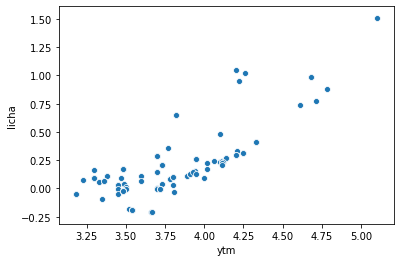

In [32]:
sns.scatterplot(df_zhongpiao['ytm'],df_zhongpiao['licha'])

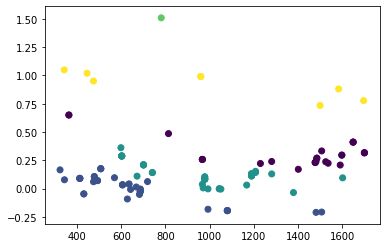

In [63]:
y_pred = KMeans(n_clusters=5, random_state=9).fit_predict(df_zhongpiao[['ytm','licha']])
plt.scatter(df_zhongpiao['days'],df_zhongpiao['licha'], c=y_pred)
plt.show()

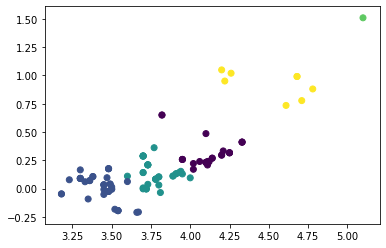

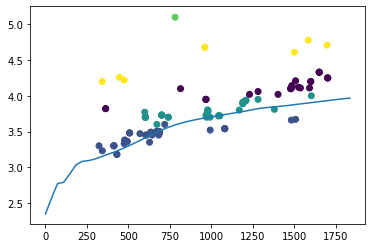

In [64]:
plt.scatter(df_zhongpiao['ytm'],df_zhongpiao['licha'], c=y_pred)
plt.show()
plt.scatter(df_zhongpiao['days'],df_zhongpiao['ytm'], c=y_pred)
plt.plot(df_full)
plt.show()

In [65]:
df_zhongpiao['pred']=y_pred
for one in df_zhongpiao.groupby('pred'):
    print(one[1])

        days          name   ytm rating     licha  pred  fix
63    967.25    20蓝星MTN003  3.95    AAA  0.257249     0    1
64    967.25    20蓝星MTN003  3.95    AAA  0.257249     0    1
65    967.25    20蓝星MTN003  3.95    AAA  0.257249     0    1
96   1230.05  19华发集团MTN001  4.02    AAA    0.2212     0    1
98   1281.15  19绍兴交投MTN001  4.06    AAA  0.238967     0    1
101  1401.60   19甬交投MTN002  4.02    AAA  0.170119     0    1
103  1478.25  19兆润投资MTN002   4.1    AAA    0.2307     0    1
104  1478.25  19兆润投资MTN002   4.1    AAA    0.2307     0    1
105  1478.25  19兆润投资MTN002   4.1    AAA    0.2307     0    1
107  1481.90   19豫交投MTN001  4.11    AAA  0.239544     0    1
108  1485.55  19华发集团MTN005  4.14    AAA  0.268389     0    1
109  1485.55  19华发集团MTN005  4.14    AAA  0.268389     0    1
112  1507.45  19天津轨交MTN003  4.21    AAA  0.332319     0    1
113  1525.70   19石国投MTN001  4.12    AAA  0.236824     0    1
114  1536.65   19渝高速MTN001  4.11    AAA  0.223643     0    1
118  1591.40   20豫交投MTN0

C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


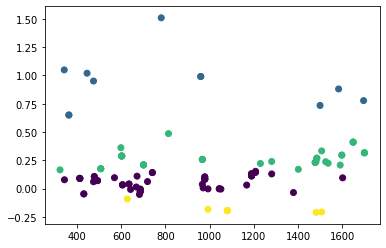

In [66]:
df_zhongpiao['fix']=[1]*len(df_zhongpiao.index)
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(df_zhongpiao[['fix','licha']])
plt.scatter(df_zhongpiao['days'],df_zhongpiao['licha'], c=y_pred)
plt.show()

In [90]:
font={'family':'msyh.ttc',
#      'style':'italic',
#     'weight':'normal',
#       'color':'red',
      'size':8
}
font={}

C:\Users\zikep\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zikep\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


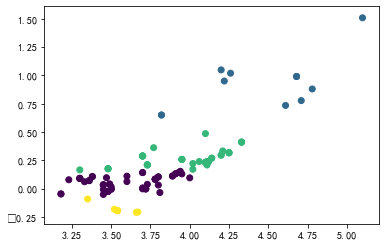

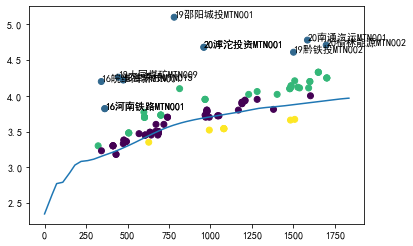

In [103]:
plt.scatter(df_zhongpiao['ytm'],df_zhongpiao['licha'], c=y_pred)
plt.show()

plt.scatter(df_zhongpiao['days'],df_zhongpiao['ytm'], c=y_pred)
plt.plot(df_full)
for point in df_zhongpiao[df_zhongpiao['licha'].abs()>0.5].index:
    point=df_zhongpiao.loc[point]
    _x,_y,_name=point['days'],point['ytm'],point['name']
    plt.text( _x,_y,_name)
    
plt.savefig('output.png',transparent=True)
plt.show()

In [93]:
# 查找字体路径
import matplotlib
print(matplotlib.matplotlib_fname())
# 查找字体缓存路径
print(matplotlib.get_cachedir())

C:\Users\zikep\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\zikep\.matplotlib


In [74]:
df_zhongpiao[df_zhongpiao['licha'].abs()>0.5]

,days,name,ytm,rating,licha,pred,fix
15,445.30,18大同煤矿MTN009,4.26,AAA,1.01916,1,1
17,474.50,18津保投MTN015,4.22,AAA,0.95,1,1
110,1500.15,19黔铁投MTN002,4.61,AAA,0.734343,1,1
128,1697.25,20榆林能源MTN002,4.71,AA+,0.777038,1,1
132,1584.10,20南通汽运MTN001,4.78,AA/AAA,0.8799,1,1
133,342.00,16皖维高新MTN001,4.2,AA,1.04835,1,1
134,363.00,16河南铁路MTN001,3.82,AA,0.649678,1,1
135,363.00,16河南铁路MTN001,3.82,AA,0.649678,1,1
136,781.10,19邵阳城投MTN001,5.1,AA,1.50865,1,1
138,959.95,20滹沱投资MTN001,4.68,AA,0.99003,1,1


In [71]:
df_zhongpiao['pred']=y_pred
for one in df_zhongpiao.groupby('pred'):
    print('\n\n\n',one[1]['licha'].mean(),'\n\n',one[1]['name'].drop_duplicates())




 0.055964375433125484 

 7       16川高速MTN001
8       18河钢集MTN010
13       18汇金MTN014
16     18中银投资MTN001
18      18冀交投MTN001
21      19河钢集MTN001
26     19深圳水务MTN001
33      19中建材MTN001
37      19陕延油MTN004
39      19闽能源MTN001
40     17宁波轨交MTN001
41       17金地MTN001
44      17川发展MTN001
45      19中交建MTN002
47       19华润MTN005
57     19华润控股MTN004
58     17诚通控股MTN001
62      20南航股MTN007
66     20广州地铁MTN001
67     20中银投资MTN001
73       20闽投MTN005
78     16皖交控MTN002B
80     20深圳地铁MTN002
89      18闽高速MTN003
90      18甬开投MTN001
92      18京热力MTN002
94      18大横琴MTN002
97      19锡公用MTN001
100      19闽投MTN003
121    20朝阳国资MTN001
Name: name, dtype: object



 0.9269876194376192 

 15     18大同煤矿MTN009
17      18津保投MTN015
110     19黔铁投MTN002
128    20榆林能源MTN002
132    20南通汽运MTN001
133    16皖维高新MTN001
134    16河南铁路MTN001
136    19邵阳城投MTN001
138    20滹沱投资MTN001
Name: name, dtype: object



 0.2679764995764995 

 5      16武汉地产MTN003
23      19中交投MTN001
27      15津城建MTN001
28       19晋煤MTN001
53      

C:\Users\zikep\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
